In [1]:
from datetime import datetime
import time 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
combined_df = pd.read_csv('Inertia_Final.csv')

print("Combined DataFrame from 'Inertia_Final.csv':")
print(combined_df)

Combined DataFrame from 'Inertia_Final.csv':
       Timestamp (microseconds)  Accel X (g)  Accel Y (g)  Accel Z (g)  \
0              1616156158176000      -0.8857      -0.9150       9.5503   
1              1616156158676000      -0.8139       1.2541       9.4306   
2              1616156159175000     -10.2466     -11.1079      16.0610   
3              1616156159676000      -4.3679      -7.6616      -4.6180   
4              1616156160176000       5.0936      -7.1863      -5.2249   
...                         ...          ...          ...          ...   
32411          1621446623827000      -1.9750       4.6900       6.4240   
32412          1621446624328000      -0.6940       4.2090       6.9890   
32413          1621446624828000      -2.4640       3.8000       7.0220   
32414          1621446625327000       0.4430       5.1760       5.7150   
32415          1621446625828000      -3.9340       5.5670       9.8950   

         Activity_Label  Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s) 

In [3]:
file_path = "HAR_final.csv"
combined_df = pd. read_csv(file_path)

print("Combined DataFrame from 'HAR_final.csv':")
print(combined_df)

Combined DataFrame from 'HAR_final.csv':
         Time_elapse  Accel X (g)  Accel Y (g)  Accel Z (g)  Gyro X (°/s)  \
0              0.009     5.223900    -1.424400     3.243000     -0.050164   
1              0.020    -0.477850    -2.151500     8.487600     -0.257890   
2              0.030    -4.294600    -3.317400    12.292000     -1.036600   
3              0.039    -7.452800    -3.385200     9.447400     -2.078400   
4              0.050    -8.972700    -3.144100     4.450400     -2.698400   
...              ...          ...          ...          ...           ...   
1066643       59.086     0.566857    -0.256331    -0.035400      0.000122   
1066644       59.085     0.662857    -0.256331    -0.016401      0.000122   
1066645       59.108     0.585444    -0.256621     0.022825      0.000016   
1066646       59.109     0.470444    -0.199620     0.061825      0.000016   
1066647       59.110     0.451444    -0.141621     0.118825      0.000016   

         Gyro Y (°/s)  Gyro Z (°/s

In [4]:
combined_df = pd.read_csv('Inertia_Final.csv')

file_path = "HAR_final.csv"
df_har = pd.read_csv(file_path)

merged_df = pd.concat([combined_df, df_har], ignore_index=True)

print("Merged DataFrame:")
print (merged_df)

Merged DataFrame:
         Timestamp (microseconds)  Accel X (g)  Accel Y (g)  Accel Z (g)  \
0                1616156158176000    -0.885700    -0.915000     9.550300   
1                1616156158676000    -0.813900     1.254100     9.430600   
2                1616156159175000   -10.246600   -11.107900    16.061000   
3                1616156159676000    -4.367900    -7.661600    -4.618000   
4                1616156160176000     5.093600    -7.186300    -5.224900   
...                           ...          ...          ...          ...   
1099059          1614156994956682     0.566857    -0.256331    -0.035400   
1099060          1614415526097549     0.662857    -0.256331    -0.016401   
1099061          1616357432608418     0.585444    -0.256621     0.022825   
1099062          1614465037863056     0.470444    -0.199620     0.061825   
1099063          1619331576895488     0.451444    -0.141621     0.118825   

        Activity_Label  Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s)  Tim

In [5]:
print (merged_df.columns)

Index(['Timestamp (microseconds)', 'Accel X (g)', 'Accel Y (g)', 'Accel Z (g)',
       'Activity_Label', 'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)',
       'Time_elapse', 'Subject_ID'],
      dtype='object')


In [6]:
desired_column_order = [
    'Timestamp (microseconds)', 'Accel X (g)', 'Accel Y (g)', 'Accel Z (g)',
    'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)', 'Activity_Label',
    'Time_elapse', 'Subject_ID'
]

merged_df = merged_df[desired_column_order]

print("\nReordered DataFrame:")
print(merged_df)


Reordered DataFrame:
         Timestamp (microseconds)  Accel X (g)  Accel Y (g)  Accel Z (g)  \
0                1616156158176000    -0.885700    -0.915000     9.550300   
1                1616156158676000    -0.813900     1.254100     9.430600   
2                1616156159175000   -10.246600   -11.107900    16.061000   
3                1616156159676000    -4.367900    -7.661600    -4.618000   
4                1616156160176000     5.093600    -7.186300    -5.224900   
...                           ...          ...          ...          ...   
1099059          1614156994956682     0.566857    -0.256331    -0.035400   
1099060          1614415526097549     0.662857    -0.256331    -0.016401   
1099061          1616357432608418     0.585444    -0.256621     0.022825   
1099062          1614465037863056     0.470444    -0.199620     0.061825   
1099063          1619331576895488     0.451444    -0.141621     0.118825   

         Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s) Activity_Label 

In [7]:
initial_rows = merged_df.shape[0]
merged_df.dropna(inplace=True)
nan_removed = initial_rows - merged_df.shape[0]

initial_rows = merged_df.shape[0]
merged_df.drop_duplicates(inplace=True)
duplicate_removed = initial_rows - merged_df.shape[0]

merged_df.reset_index(drop=True, inplace=True)

print(f"Removed {nan_removed} rows with NaN values.")
print(f"Removed {duplicate_removed} duplicate rows.")

print("\nDataFrame after removing NaN values, duplicates, and resetting the index:")
print(merged_df)

Removed 18038 rows with NaN values.
Removed 2413 duplicate rows.

DataFrame after removing NaN values, duplicates, and resetting the index:
         Timestamp (microseconds)  Accel X (g)  Accel Y (g)  Accel Z (g)  \
0                1616156158176000    -0.885700    -0.915000     9.550300   
1                1616156158676000    -0.813900     1.254100     9.430600   
2                1616156159175000   -10.246600   -11.107900    16.061000   
3                1616156159676000    -4.367900    -7.661600    -4.618000   
4                1616156160176000     5.093600    -7.186300    -5.224900   
...                           ...          ...          ...          ...   
1078608          1614156994956682     0.566857    -0.256331    -0.035400   
1078609          1614415526097549     0.662857    -0.256331    -0.016401   
1078610          1616357432608418     0.585444    -0.256621     0.022825   
1078611          1614465037863056     0.470444    -0.199620     0.061825   
1078612          1619331

In [8]:
numerical_cols = ['Accel X (g)', 'Accel Y (g)', 'Accel Z (g)',
                  'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)']

scaler_minmax = MinMaxScaler()
merged_df[numerical_cols] = scaler_minmax.fit_transform(merged_df[numerical_cols])

scaler_standard = StandardScaler()
merged_df[numerical_cols] = scaler_standard.fit_transform(merged_df[numerical_cols])

print("\nNormalized and scaled DataFrame:")
print(merged_df)


Normalized and scaled DataFrame:
         Timestamp (microseconds)  Accel X (g)  Accel Y (g)  Accel Z (g)  \
0                1616156158176000    -0.173760    -0.137676     2.107255   
1                1616156158676000    -0.160640     0.305352     2.080949   
2                1616156159175000    -1.884325    -2.219527     3.538072   
3                1616156159676000    -0.810081    -1.515637    -1.006428   
4                1616156160176000     0.918867    -1.418559    -1.139802   
...                           ...          ...          ...          ...   
1078608          1614156994956682     0.091673    -0.003146     0.000663   
1078609          1614415526097549     0.109215    -0.003146     0.004838   
1078610          1616357432608418     0.095069    -0.003205     0.013459   
1078611          1614465037863056     0.074055     0.008437     0.022030   
1078612          1619331576895488     0.070583     0.020283     0.034556   

         Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s) Act

In [9]:
merged_df.to_csv('Final_Cleaned_HAR_And_Inertia.csv', index=False)

print("\nDataFrame after saving:")
print(merged_df)


DataFrame after saving:
         Timestamp (microseconds)  Accel X (g)  Accel Y (g)  Accel Z (g)  \
0                1616156158176000    -0.173760    -0.137676     2.107255   
1                1616156158676000    -0.160640     0.305352     2.080949   
2                1616156159175000    -1.884325    -2.219527     3.538072   
3                1616156159676000    -0.810081    -1.515637    -1.006428   
4                1616156160176000     0.918867    -1.418559    -1.139802   
...                           ...          ...          ...          ...   
1078608          1614156994956682     0.091673    -0.003146     0.000663   
1078609          1614415526097549     0.109215    -0.003146     0.004838   
1078610          1616357432608418     0.095069    -0.003205     0.013459   
1078611          1614465037863056     0.074055     0.008437     0.022030   
1078612          1619331576895488     0.070583     0.020283     0.034556   

         Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s) Activity_Lab

# Activity Distribution 

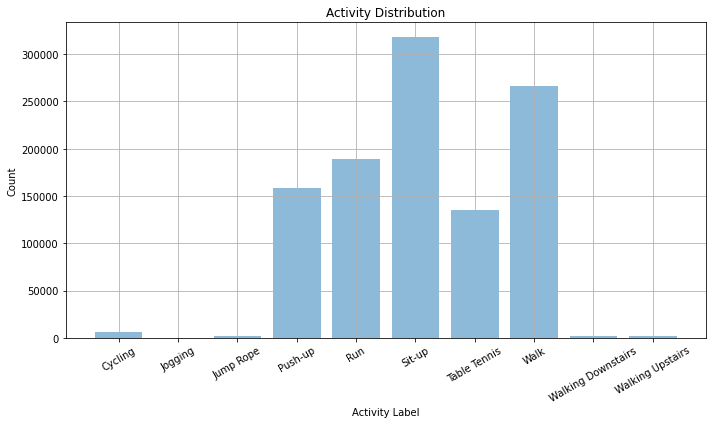

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.read_csv('Final_Cleaned_HAR_And_Inertia.csv')

activity_counts = merged_df['Activity_Label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(activity_counts.index, activity_counts.values, align='center', alpha=0.5)
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.title('Activity Distribution')
plt.xticks(activity_counts.index, rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

# Applying SMOTE 

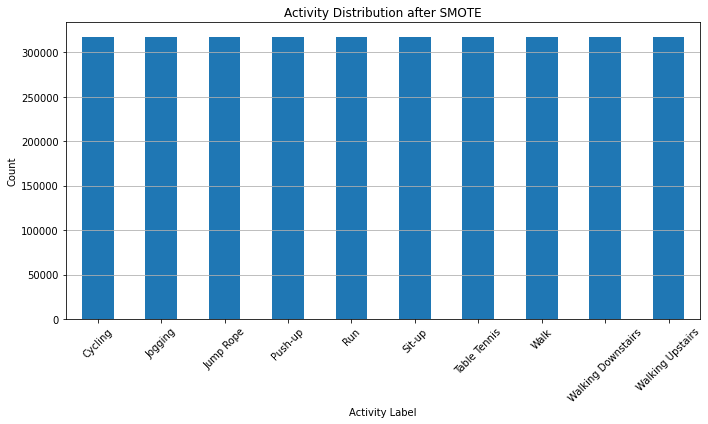

In [11]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

merged_df = pd.read_csv('Final_Cleaned_HAR_And_Inertia.csv')

X = merged_df.drop('Activity_Label', axis=1)
y = merged_df['Activity_Label']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Activity_Label'] = y_resampled

activity_counts = resampled_df['Activity_Label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title('Activity Distribution after SMOTE')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
from imblearn.over_sampling import SMOTE

merged_df = pd.read_csv('Final_Cleaned_HAR_And_Inertia.csv')

X = merged_df.drop('Activity_Label', axis=1)
y = merged_df['Activity_Label']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Activity_Label'] = y_resampled

resampled_df.to_csv('Final_Resampled_HAR_And_Inertia.csv', index=False)
print("Resampled dataset saved successfully.")

Resampled dataset saved successfully.


In [13]:
df = pd.read_csv('Final_Resampled_HAR_And_Inertia.csv')

print("\nDataFrame After loading:")
print(df)


DataFrame After loading:
         Timestamp (microseconds)  Accel X (g)  Accel Y (g)  Accel Z (g)  \
0                1616156158176000    -0.173760    -0.137676     2.107255   
1                1616156158676000    -0.160640     0.305352     2.080949   
2                1616156159175000    -1.884325    -2.219527     3.538072   
3                1616156159676000    -0.810081    -1.515637    -1.006428   
4                1616156160176000     0.918867    -1.418559    -1.139802   
...                           ...          ...          ...          ...   
3177405          1621444994715142     0.233441    -1.648441    -0.820337   
3177406          1621445416690000     0.074065    -1.330325    -0.403241   
3177407          1621445368644327     0.593193    -1.481575     1.216546   
3177408          1621445434867000     0.409219    -1.081881    -0.847780   
3177409          1621444933158335    -0.185485    -2.102400    -0.736247   

         Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s)    Time_ela

In [6]:
import pandas as pd

df = pd.read_csv('Final_Resampled_HAR_And_Inertia.csv')

print("\nDataFrame Columns:")
print(df.columns)

print("\nDataFrame Head:")
print(df.head())

unique_values = df['Activity_Label'].unique()
print("\nUnique values in the 'activity' column:")
print(unique_values)


DataFrame Columns:
Index(['Timestamp (microseconds)', 'Accel X (g)', 'Accel Y (g)', 'Accel Z (g)',
       'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)', 'Time_elapse',
       'Subject_ID', 'Activity_Label'],
      dtype='object')

DataFrame Head:
   Timestamp (microseconds)  Accel X (g)  Accel Y (g)  Accel Z (g)  \
0          1616156158176000    -0.173760    -0.137676     2.107255   
1          1616156158676000    -0.160640     0.305352     2.080949   
2          1616156159175000    -1.884325    -2.219527     3.538072   
3          1616156159676000    -0.810081    -1.515637    -1.006428   
4          1616156160176000     0.918867    -1.418559    -1.139802   

   Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s)  Time_elapse  Subject_ID  \
0     -0.764989     -0.845309      0.134371          8.0           1   
1      0.173658     -0.265426      1.160738        508.0           1   
2     -0.707602     -1.429224     -4.425213       1007.0           1   
3      0.030364     -0.102753     -0.24512